In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [10]:
class Identical(nn.Module):
    def forward(self, x):
        return x

In [11]:
activation = Identical()
d_in, dim, d_out = 28*28, 128, 10

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(d_in, dim),
    activation,
    nn.Linear(dim, dim),
    activation,
    nn.Linear(dim, d_out),
)

In [12]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [13]:
max_epochs = 10
accuracy = {"train": [], "valid": []}
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader:
            if k == "train":
                model.train()
                optimizer.zero_grad()
                outp = model(x_batch)
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()
            else:
                model.eval()
                with torch.no_grad():
                    outp = model(x_batch)
            preds = outp.argmax(-1)
            correct =  preds[preds==y_batch]
            all = len(y_batch)
            epoch_correct += correct.count_nonzero()
            epoch_all += all
                
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)


Epoch: 1
Loader: train. Accuracy: 0.7729666829109192
Loader: valid. Accuracy: 0.7867000102996826
Epoch: 2
Loader: train. Accuracy: 0.8017833232879639
Loader: valid. Accuracy: 0.8044000267982483
Epoch: 3
Loader: train. Accuracy: 0.8055999875068665
Loader: valid. Accuracy: 0.8051999807357788
Epoch: 4
Loader: train. Accuracy: 0.8079333305358887
Loader: valid. Accuracy: 0.8061000108718872
Epoch: 5
Loader: train. Accuracy: 0.8091833591461182
Loader: valid. Accuracy: 0.8065000176429749
Epoch: 6
Loader: train. Accuracy: 0.810699999332428
Loader: valid. Accuracy: 0.8075000047683716
Epoch: 7
Loader: train. Accuracy: 0.8115166425704956
Loader: valid. Accuracy: 0.8072999715805054
Epoch: 8
Loader: train. Accuracy: 0.812583327293396
Loader: valid. Accuracy: 0.8068000078201294
Epoch: 9
Loader: train. Accuracy: 0.8139500021934509
Loader: valid. Accuracy: 0.8077999949455261
Epoch: 10
Loader: train. Accuracy: 0.8150166869163513
Loader: valid. Accuracy: 0.808899998664856


In [18]:
elu_accuracy = test_activation_function(nn.ELU())

Epoch: 1
Loader: train. Accuracy: 0.788100004196167
Loader: valid. Accuracy: 0.822700023651123
Epoch: 2
Loader: train. Accuracy: 0.8462833166122437
Loader: valid. Accuracy: 0.8571000099182129
Epoch: 3
Loader: train. Accuracy: 0.8624500036239624
Loader: valid. Accuracy: 0.8633000254631042
Epoch: 4
Loader: train. Accuracy: 0.8710500001907349
Loader: valid. Accuracy: 0.8669999837875366
Epoch: 5
Loader: train. Accuracy: 0.8762833476066589
Loader: valid. Accuracy: 0.8686000108718872
Epoch: 6
Loader: train. Accuracy: 0.8799166679382324
Loader: valid. Accuracy: 0.8734999895095825
Epoch: 7
Loader: train. Accuracy: 0.8830666542053223
Loader: valid. Accuracy: 0.8734999895095825
Epoch: 8
Loader: train. Accuracy: 0.8853333592414856
Loader: valid. Accuracy: 0.8745999932289124
Epoch: 9
Loader: train. Accuracy: 0.8866000175476074
Loader: valid. Accuracy: 0.8758999705314636
Epoch: 10
Loader: train. Accuracy: 0.8873000144958496
Loader: valid. Accuracy: 0.8762999773025513


In [15]:
def test_activation_function(activation):
    d_in, dim, d_out = 28*28, 128, 10

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(d_in, dim),
        activation,
        nn.Linear(dim, dim),
        activation,
        nn.Linear(dim, d_out)
    )
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())
    loaders = {"train": train_dataloader, "valid": valid_dataloader}
    
    max_epochs = 10
    accuracy = {"train": [], "valid": []}
    for epoch in range(max_epochs):
        for k, dataloader in loaders.items():
            epoch_correct = 0
            epoch_all = 0
            for x_batch, y_batch in dataloader:
                if k == "train":
                    model.train()
                    optimizer.zero_grad()
                    outp = model(x_batch)
                    loss = criterion(outp, y_batch)
                    loss.backward()
                    optimizer.step()
                else:
                    model.eval()
                    with torch.no_grad():
                        outp = model(x_batch)
                preds = outp.argmax(-1)
                correct =  preds[preds==y_batch]
                all = len(y_batch)
                epoch_correct += correct.count_nonzero()
                epoch_all += all
            if k == "train":
                print(f"Epoch: {epoch+1}")
            print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
            accuracy[k].append(epoch_correct/epoch_all)
    return accuracy["valid"]

In [16]:
plain_accuracy = test_activation_function(Identical())
relu_accuracy = test_activation_function(nn.ReLU())
leaky_relu_accuracy = test_activation_function(nn.LeakyReLU())

Epoch: 1
Loader: train. Accuracy: 0.7717499732971191
Loader: valid. Accuracy: 0.7882999777793884
Epoch: 2
Loader: train. Accuracy: 0.8011999726295471
Loader: valid. Accuracy: 0.8041999936103821
Epoch: 3
Loader: train. Accuracy: 0.8054666519165039
Loader: valid. Accuracy: 0.8066999912261963
Epoch: 4
Loader: train. Accuracy: 0.8077166676521301
Loader: valid. Accuracy: 0.807200014591217
Epoch: 5
Loader: train. Accuracy: 0.8094666600227356
Loader: valid. Accuracy: 0.8066999912261963
Epoch: 6
Loader: train. Accuracy: 0.8108999729156494
Loader: valid. Accuracy: 0.8062000274658203
Epoch: 7
Loader: train. Accuracy: 0.8121333122253418
Loader: valid. Accuracy: 0.8070999979972839
Epoch: 8
Loader: train. Accuracy: 0.8130000233650208
Loader: valid. Accuracy: 0.8075000047683716
Epoch: 9
Loader: train. Accuracy: 0.8141666650772095
Loader: valid. Accuracy: 0.8090999722480774
Epoch: 10
Loader: train. Accuracy: 0.8149166703224182
Loader: valid. Accuracy: 0.8098999857902527
Epoch: 1
Loader: train. Accura

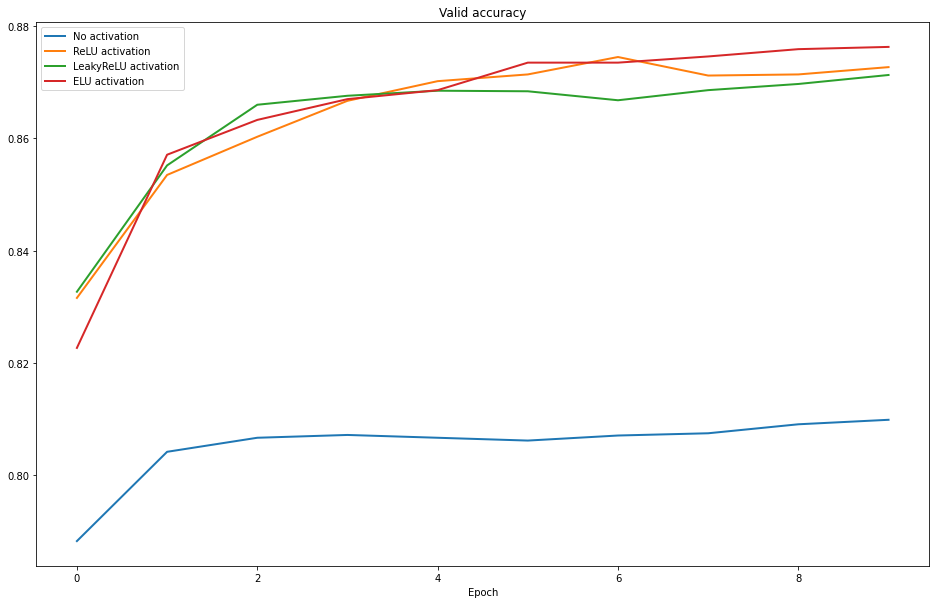

In [19]:
plt.figure(figsize=(16, 10))
plt.title("Valid accuracy")
plt.plot(range(max_epochs), plain_accuracy, label="No activation", linewidth=2)
plt.plot(range(max_epochs), relu_accuracy, label="ReLU activation", linewidth=2)
plt.plot(range(max_epochs), leaky_relu_accuracy, label="LeakyReLU activation", linewidth=2)
plt.plot(range(max_epochs), elu_accuracy, label="ELU activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()